<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_52_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 52: Derivatives


In the Last class, you learnt to build a likelihood and log likelihood function as part of the building the cost function process for logistic regression to calculate the coefficients. In this class, you build the regularised cost function and also will learn the concepts of derivatives that are heavily used in machine learning and deep learning.



# Derivatives/Differentiation

---

#### Activity 1: Derivatives (or Differentiation)

$$J(\beta) = -\frac{1}{m} \sum_{i = 1}^m \{ y \log p_i + (1 - y) \log(1 - p_i) \} + \frac{\lambda}{2m} \sum_{j = 1}^n \beta_j^2$$

The regularised cost function, for the different values of $\beta$ produces different values. But we are looking for those $\beta$ values for which the value of the cost function is minimum. For this, you need to differentiate the regularised cost function wrt the betas i.e. $\frac{\partial J}{\partial \beta_0}, \frac{\partial J}{\partial \beta_1}, \frac{\partial J}{\partial \beta_2}, \dots , \frac{\partial J}{\partial \beta_n}$. For this, you need to learn the concept of derivatives (or differentiation).


**A derivative (or differentiation) is defined as the rate of change in one quantity wrt the change in another quantity.** Let's understand this concept with the help of an example.

Consider a car travelling on a hill that has a curved path as shown in the image below.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-01.jpg' width = 800></center>

Suppose, you want to find out:

1. the rate of change in the vertical distance travelled by the car wrt to the change in the horizontal distance.

2. the point (on the horizontal axis) at which the hill has its lowest height.

To answer both the above questions, you need derivatives.

**Q: How is it related to the regularised cost function?**

**A:** Using derivatives, we want to find the values of betas (called optimised betas) at which the cost function has its lowest value. These optimised beta values are used to calculate the decision boundary and thereby to build a logistic regression model.

**Q: How derivatives are used to find out the points at which the value of a cost function (regularised or non-regularised) is zero?**

**A:** Let's continue with the above example and try to find out the points on the horizontal axis at which the height of the hill is the minimum (or lowest).

You can represent the curvature of the hill on the $x$-$y$ axes as shown below.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-02.jpg' width = 700></center>


You can draw different tangents (**a tangent at a point is a straight line that touches a curve**) at different points on this curve as well as shown in the images below.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-03.jpg' width = 700></center>

The slope of the tangent shown in the above image is positive because the tangent makes an acute angle with the $x$-axis. In the next image, the slope of the second tangent is 0 because it is parallel to the $x$-axis.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-04.jpg' width = 700></center>

In the next image, the slope of the third tangent is negative because it makes an obtuse angle with the $x$-axis.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-05.jpg' width = 700></center>

The next image shows three more tangents that are parallel to the $x$-axis.

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-06.jpg' width = 700></center>

All the tangents having the slope equals to zero are shown in the purple colour.

**Q: What is so special about the tangents having the slope equal to 0?**

**A: A point on a curve at which the slope of a tangent is zero, is the point where the curve has either its maximum value (peak) or minimum value (valley).** For e.g., at the point $x_2$, the curve has its peak (or maximum value) and at $x_5$, it has its valley (or minimum value).

<center><img src ='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-07.jpg' width = 800></center>

Using derivatives (or differentiation), you can get the mathematical expression of tangents to any curve and then equate them with zero to find out the points at which the slope of these tangents are equal to zero.


---

#### Activity 2: Rate of Change & Slope of A Tangent

**Q: How to compute derivatives?**

As discussed earlier, a derivative (or differentiation) is defined as the rate of change in one quantity wrt the change in another quantity.

To calculate the rate of change, first, we need a relationship between the two quantities. In this case, we need a relationship between the height of the hill and its length. So here, we are provided with the equation of the curved path (or curvature/trajectory) of the hill shown in the above example. It is given as

$$y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$$

where

- $y$ is the height of the hill from the ground

- $x$ is the horizontal length of the hill.

Let's plot the curvature of the hill using the `matplotlib.pyplot` module.

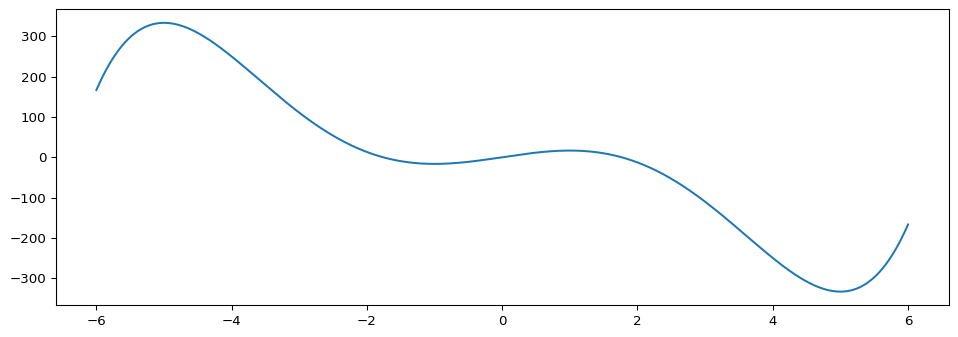

In [ ]:
#  Plot the curvature of the hill using the 'matplotlib.pyplot' module for the length of the hill bounded between x = -6 and x = 6 only.
import numpy as np
import matplotlib.pyplot as plt

def curvature(x):
  return x ** 5 / 5 - 26 * x ** 3 / 3 + 25 * x

x_values = np.linspace(-6, 6, 100000) # Here, we have taken 100 thousand points between x = -6 and x = 6.
y_values = curvature(x_values)

plt.figure(figsize = (12, 4), dpi = 96)
plt.plot(x_values, y_values)
plt.show()

In [ ]:
y_values[:10]

array([166.8       , 166.84619649, 166.89238503, 166.93856562,
       166.98473826, 167.03090296, 167.07705971, 167.12320852,
       167.16934939, 167.2154823 ])

Next, you need to find the rate to change of height of the hill $y$ wrt the change in the length of the hill $x$ to calculate the derivative i.e.

$$\frac{y_2 - y_1}{x_2 - x_1}$$

We can also represent the above ratio as

$$\frac{\delta y}{\delta x}$$

where

- $\delta y$ (to be read as **delta $y$**) denotes a small change in the values of $y$

- $\delta x$ (to be read as **delta $x$**) denotes a small change in the values of $x$



---

#### Activity 3: Derivative as Rate of Change

**Q: How to calculate the rate of change in $y$ wrt the change in $x$?**

**A:** We already know that $y$ is dependent on $x$. In other words, $y$ is a function of $x$. Mathematically, it can be represented as

$$y = f(x)$$

So, for $x = 1$, the equation of trajectory of the hill gives,

\begin{align}
y &= f(1) \\
&= \frac{1}{5} - \frac{26}{3} + 25 \\
&= 16.533
\end{align}

Similarly, for $x = 2$, the equation of trajectory of the hill gives,

\begin{align}
y &= f(2) \\
&= \frac{2^5}{5} - \frac{26}{3}\times 2^4 + 25 \times 2 \\
&= -12.933
\end{align}

With this idea in mind, now let's consider the right-most part of the hill as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-09.jpg' width = 700></center>

Also, let a line intersect this part of the curve at the points A and B as shown in the above image. This line will become a tangent to the curve at the point of minimum value, i.e. $x_5$, when both the points A and B approach each other as shown in the images below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-10.jpg' width = 700></center>

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-11.jpg' width = 700></center>

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-12.jpg' width = 700></center>

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-13.jpg' width = 700></center>

This will happen if the vertical and the horizontal distances between the points A and B approach 0.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-14.jpg' width = 700></center>

i.e., $\delta y \rightarrow 0$ and $\delta x \rightarrow 0$

where

- $\delta y$ is a small change in the values of $y$ or graphically, the vertical distance between the points A and B=

- $\delta x$ (to be read as **delta $x$**) is a small change in the values of $x$ or graphically, the horizontal distance between the points A and B

Let $x$ and $x + h$ be any two arbitrary points on the $x$-axis. So the corresponding points on the $y$-axis will be $y = f(x)$ and $y = f(x + h)$ (on substituting $x$ and $x + h$ in the equation of trajectory of the hill) as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-15.jpg' width = 700></center>

\begin{align}
\therefore \delta x &= x + h - x \\
&= h
\end{align}

and

\begin{align}
\delta y &= f(x + h) - f(x)
\end{align}

So, the rate of small change in $y$ wrt the small change in $x$ is given as

\begin{equation}
\frac{\delta y}{\delta x} = \frac{f(x + h) - f(x)}{h}
\tag{3.1}
\end{equation}

And when the small change in the $x$ approaches, 0 i.e. $h \rightarrow 0$, then the equation (3.1) becomes

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h}
\tag{3.2}
\end{equation}

The term $\lim_{h \rightarrow 0}$ denotes that $h$ is approaching to 0 or limiting to 0.

Now, on substituting the two expressions

$$f(x + h) = \frac{(x + h)^5}{5} - \frac{26}{3}(x + h)^3 + 25(x + h)$$

and

$$f(x) = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$$

in equation (3.2), we get

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{\left( \frac{1}{5}(x + h)^5 - \frac{26}{3}(x + h)^3 + 25(x + h) \right) - \left( \frac{x^5}{5} - \frac{26}{3}x^3 + 25x \right)}{h}
\tag{3.3}
\end{equation}

In equation (3.3), let

\begin{equation}
\text{term 1} = \frac{1}{5}(x + h)^5 - \frac{26}{3}(x + h)^3 + 25(x + h)
\end{equation}

and

\begin{equation}
\text{term 2} = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x
\end{equation}

So equation (3.3) becomes,

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{\text{term 1} - \text{term 2}}{h}
\tag{3.4}
\end{equation}

---

#### Activity 4: Solving Derivative

Now, let's first expand $\text{term 1}$ separately using the binomial expansion i.e.

\begin{align}
(a + b)^n &= \sum_{r = 0}^n {}^nC_r a^{n - r} b^r \\
&= {}^nC_0 a^n b^0 + {}^nC_1 a^{n - 1} b + {}^nC_2 a^{n - 2} b^2 + \dots + {}^nC_{n - 1} a^1 b^{n - 1} + {}^nC_n a^0 b^n    
\end{align}

and

\begin{equation}
{}^nC_r = \frac{n!}{(n - r)! r!}
\end{equation}

So upon expansion, $\text{term 1}$ becomes

\begin{align}
\text{term 1} &= \frac{1}{5}(x + h)^5 - \frac{26}{3}(x + h)^3 - 25(x + h) \\
&= \frac{1}{5} \left( {}^5C_0 x^5 + {}^5C_1 x^4 h + {}^5C_2 x^3 h^2 + {}^5C_3 x^2 h^3 + {}^5C_4 x h^4 + {}^5C_5 h^5 \right) - \frac{26}{3} \left( x^3 + 3x^2h + 3xh^2 + h^3 \right) + 25(x + h) \\
&= \frac{1}{5} \left( x^5 + 5 x^4 h + 10 x^3 h^2 + 10 x^2 h^3 + 5 x h^4 + h^5 \right) - \frac{26}{3} \left( x^3 + 3x^2h + 3xh^2 + h^3 \right) + 25(x + h)
\end{align}

On substituting the terms (1) and (2) in equation (3.4), we get

\begin{equation}
\frac{dy}{dx} = \lim_{h \rightarrow 0} \frac{\left( \frac{1}{5}(x^5 + 5 x^4 h + 10 x^3 h^2 + 10 x^2 h^3 + 5 x h^4 + h^5) - \frac{26}{3}(x^3 + 3x^2h + 3xh^2 + h^3) + 25(x + h) \right) - \left( \frac{x^5}{5} - \frac{26}{3}x^3 + 25x \right)}{h}
\tag{4.1}
\end{equation}

In the above equation, let's neglect all the higher powers of $h$ i.e., $h^2, h^3, h^4$ and $h^5$ because we assume that $h$ approaches to 0 or it is very very small, say $h = \frac{1}{10^5}$. So $h^2 = \frac{1}{10^{10}}$

Hence, on neglecting all the terms having higher powers of $h$ in equation (4.1), we get

\begin{align}
\frac{dy}{dx} &= \lim_{h \rightarrow 0} \frac{\left( \frac{1}{5}(x^5 + 5 x^4 h) - \frac{26}{3}(x^3 + 3x^2h) + 25(x + h) \right) - \left( \frac{x^5}{5} - \frac{26}{3}x^3 + 25x \right)}{h} \\
&= \lim_{h \rightarrow 0} \frac{ \frac{x^5}{5} + x^4 h - \frac{26}{3}x^3 - 26 x^2h + 25x + 25h  - \frac{x^5}{5} + \frac{26}{3}x^3 - 25x}{h} \\
&= \lim_{h \rightarrow 0} \frac{ x^4 h  - 26 x^2h + 25h}{h} \\
&= \lim_{h \rightarrow 0} \frac{h (x^4  - 26 x^2 + 25)}{h} \\
&= \lim_{h \rightarrow 0} \space{} (x^4  - 26 x^2 + 25) \\
\Rightarrow \frac{dy}{dx} &= x^4  - 26 x^2 + 25
\end{align}

Finally, we obtained the derivative of $y = \frac{x^5}{5} - \frac{26}{3}x^3 + 25x$ wrt $x$. In other words, it is the rate of a very small change in $y$ wrt the very small change in $x$.

It is also the slope of the tangent to the curve as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-16.jpg' width = 700></center>

Because in $\Delta ABC$

\begin{align}
\tan \theta &= \frac{AC}{CB} \\
&= \frac{f(x + h) - f(x)}{h}
\end{align}

For a very small change, i.e., $h \rightarrow 0$

\begin{align}
\tan \theta &= \lim_{h \rightarrow 0} \frac{f(x + h) - f(x)}{h} \\
\Rightarrow \tan \theta &= \frac{dy}{dx}
\end{align}

Now, if the slope of this tangent is 0, then

\begin{align}
\frac{dy}{dx} &= 0\\
\Rightarrow x^4  - 26 x^2 + 25 &= 0 \\
\Rightarrow (x^2 - 1)(x^2 - 25) &= 0 \\
\Rightarrow (x - 1)(x + 1)(x - 5)(x + 5) &= 0
\end{align}

Hence, $x = -5, -1, 1$ and $x = 5$ are the points where the slopes of the tangents to the curvature of the hill are 0.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/derivatives-17.jpg' width = 700></center>

And at $x = -5$, the value of $y$ will be maximum (peak of the hill) and at $x = 5$, the value of $y$ will be minimum (lowest height of the hill).

In [ ]:
# Calculate the maximum and minimum heights of the hill.
print(f"Peak of the hill = {(1/5) * (-5) ** 5 + (-26/3) * (-5) ** 3 + 25 * (-5):.3f} units")
print(f"Lowest height of the hill = {(1/5) * 5 ** 5 + (-26/3) * 5 ** 3 + 25 * 5:.3f} units")

Peak of the hill = 333.333 units
Lowest height of the hill = -333.333 units


**Note:** In physical terms, when the height of a landscape is negative, it means that part of the landscape is submerged under an ocean or a sea as shown in the image below.

<center><img src = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/Carter-Hypso-500.jpg'>

**Image credits:** *http://my.ilstu.edu/~jrcarter/LDEO/Geo201maps.htm*

</center>

Now that you have learnt the concept of derivatives, you are in a position to differentiate the regularised cost function wrt betas to calculate the optimum values of betas to build a logistic regression model. In other words, you are ready to calculate the rate of change in the cost function wrt change in betas. You will learn this in the next class.

For the time being, let's stop here.